In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv("my_keys.env")

True

In [3]:
alpaca_api_key = os.getenv("Alpace_API_Key")
alpaca_secret_key = os.getenv("Alpaca_API_Secret_Key")
type(alpaca_api_key)

str

In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
# Format current date as ISO format
end_date = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()

In [7]:
# Set the tickers
tickers = ["SPY", "LQD", "UNG", "AGG", "VNQ"]

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
etfs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
etfs.index = etfs.index.date

In [10]:
eft_closing_prices_df = pd.DataFrame()

eft_closing_prices_df["LQD"] = etfs["LQD"]["close"]
eft_closing_prices_df["AGG"] = etfs["AGG"]["close"]
eft_closing_prices_df["SPY"] = etfs["SPY"]["close"]
eft_closing_prices_df["UNG"] = etfs["UNG"]["close"]
eft_closing_prices_df["VNQ"] = etfs["VNQ"]["close"]


In [11]:
# Creating a column for 20 day moving average
eft_closing_prices_df["MovAvg20dLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dAGG"] = eft_closing_prices_df["AGG"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).mean()
eft_closing_prices_df["MovAvg20dVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).mean()

In [12]:
# Creating a column for 20 days stadard deviation 
eft_closing_prices_df["StDevLQD"] = eft_closing_prices_df["LQD"].rolling(window=20).std()
eft_closing_prices_df["StDevAGG"] = eft_closing_prices_df["AGG"].rolling(window=20).std()
eft_closing_prices_df["StDevSPY"] = eft_closing_prices_df["SPY"].rolling(window=20).std()
eft_closing_prices_df["StDevUNG"] = eft_closing_prices_df["UNG"].rolling(window=20).std()
eft_closing_prices_df["StDevVNQ"] = eft_closing_prices_df["VNQ"].rolling(window=20).std()

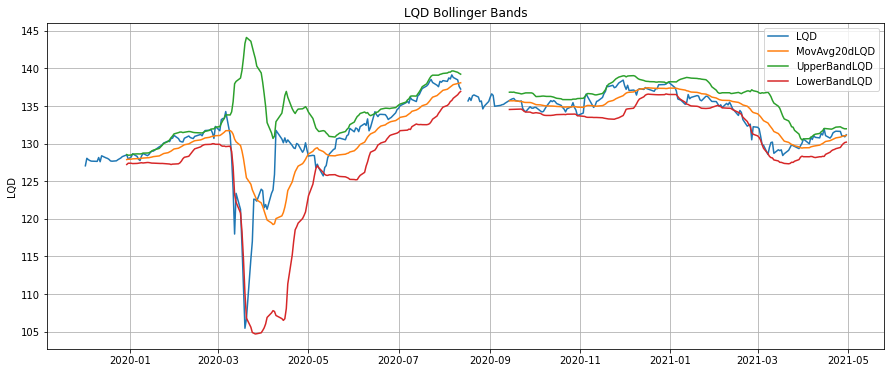

In [13]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] + (eft_closing_prices_df["StDevLQD"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandLQD"] = eft_closing_prices_df["MovAvg20dLQD"] - (eft_closing_prices_df["StDevLQD"] * 2)

# Plotting
eft_closing_prices_df[["LQD","MovAvg20dLQD","UpperBandLQD","LowerBandLQD"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LQD Bollinger Bands")
plt.axis("tight")
plt.ylabel("LQD")
plt.savefig('lqd.jpg')

In [14]:
eft_closing_prices_df['LQDhigher'] = np.where(eft_closing_prices_df['LQD']>eft_closing_prices_df['UpperBandLQD'],1,0)
eft_closing_prices_df['LQDhigher'].value_counts()

0    340
1     16
Name: LQDhigher, dtype: int64

In [15]:
eft_closing_prices_df['LQDlower'] = np.where(eft_closing_prices_df['LQD']<eft_closing_prices_df['LowerBandLQD'],1,0)
eft_closing_prices_df['LQDlower'].value_counts()

0    336
1     20
Name: LQDlower, dtype: int64

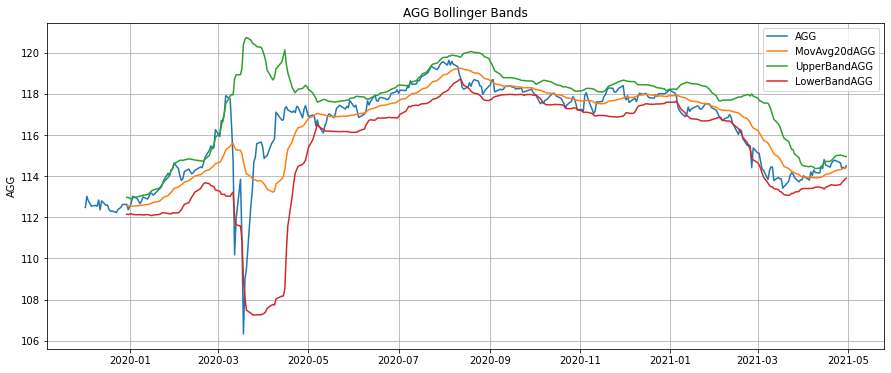

In [16]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandAGG"] = eft_closing_prices_df["MovAvg20dAGG"] + (eft_closing_prices_df["StDevAGG"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandAGG"] = eft_closing_prices_df["MovAvg20dAGG"] - (eft_closing_prices_df["StDevAGG"] * 2)

# Plotting
eft_closing_prices_df[["AGG","MovAvg20dAGG","UpperBandAGG","LowerBandAGG"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("AGG Bollinger Bands")
plt.axis("tight")
plt.ylabel("AGG")
plt.savefig('agg.jpg')

In [17]:
eft_closing_prices_df['AGGhigher'] = np.where(eft_closing_prices_df['AGG']>eft_closing_prices_df['UpperBandAGG'],1,0)
eft_closing_prices_df['AGGhigher'].value_counts()

0    341
1     15
Name: AGGhigher, dtype: int64

In [18]:
eft_closing_prices_df['AGGlower'] = np.where(eft_closing_prices_df['AGG']<eft_closing_prices_df['LowerBandAGG'],1,0)
eft_closing_prices_df['AGGlower'].value_counts()

0    337
1     19
Name: AGGlower, dtype: int64

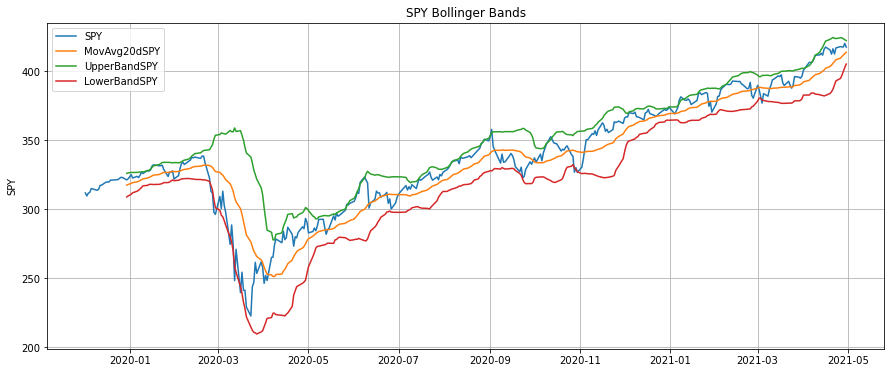

In [19]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] + (eft_closing_prices_df["StDevSPY"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandSPY"] = eft_closing_prices_df["MovAvg20dSPY"] - (eft_closing_prices_df["StDevSPY"] * 2)

# Plotting
eft_closing_prices_df[["SPY","MovAvg20dSPY","UpperBandSPY","LowerBandSPY"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("SPY Bollinger Bands")
plt.axis("tight")
plt.ylabel("SPY")
plt.savefig('spy.jpg')

In [20]:
eft_closing_prices_df['SPYhigher'] = np.where(eft_closing_prices_df['SPY']>eft_closing_prices_df['UpperBandSPY'],1,0)
eft_closing_prices_df['SPYhigher'].value_counts()

0    339
1     17
Name: SPYhigher, dtype: int64

In [21]:
eft_closing_prices_df['SPYlower'] = np.where(eft_closing_prices_df['SPY']<eft_closing_prices_df['LowerBandSPY'],1,0)
eft_closing_prices_df['SPYlower'].value_counts()

0    346
1     10
Name: SPYlower, dtype: int64

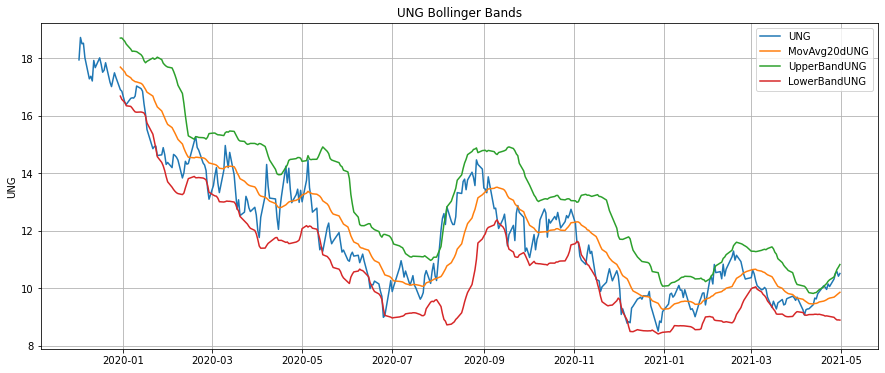

In [22]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] + (eft_closing_prices_df["StDevUNG"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandUNG"] = eft_closing_prices_df["MovAvg20dUNG"] - (eft_closing_prices_df["StDevUNG"] * 2)

# Plotting
eft_closing_prices_df[["UNG","MovAvg20dUNG","UpperBandUNG","LowerBandUNG"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("UNG Bollinger Bands")
plt.axis("tight")
plt.ylabel("UNG")
plt.savefig('ung.jpg')

In [23]:
eft_closing_prices_df['UNGhigher'] = np.where(eft_closing_prices_df['UNG']>eft_closing_prices_df['UpperBandUNG'],1,0)
eft_closing_prices_df['UNGhigher'].value_counts()

0    349
1      7
Name: UNGhigher, dtype: int64

In [24]:
eft_closing_prices_df['UNGlower'] = np.where(eft_closing_prices_df['UNG']<eft_closing_prices_df['LowerBandUNG'],1,0)
eft_closing_prices_df['UNGlower'].value_counts()

0    331
1     25
Name: UNGlower, dtype: int64

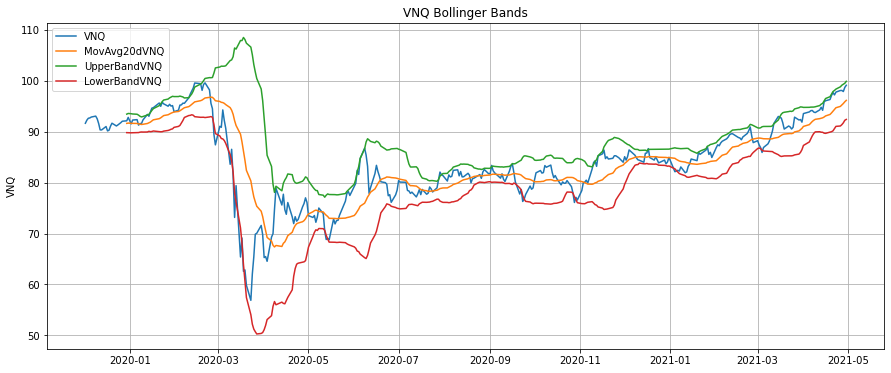

In [25]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
eft_closing_prices_df["UpperBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] + (eft_closing_prices_df["StDevVNQ"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
eft_closing_prices_df["LowerBandVNQ"] = eft_closing_prices_df["MovAvg20dVNQ"] - (eft_closing_prices_df["StDevVNQ"] * 2)

# Plotting
eft_closing_prices_df[["VNQ","MovAvg20dVNQ","UpperBandVNQ","LowerBandVNQ"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("VNQ Bollinger Bands")
plt.axis("tight")
plt.ylabel("VNQ")
plt.savefig('vnq.jpg')

In [26]:
eft_closing_prices_df['VNQhigher'] = np.where(eft_closing_prices_df['VNQ']>eft_closing_prices_df['UpperBandVNQ'],1,0)
eft_closing_prices_df['VNQhigher'].value_counts()

0    336
1     20
Name: VNQhigher, dtype: int64

In [27]:
eft_closing_prices_df['VNQlower'] = np.where(eft_closing_prices_df['VNQ']<eft_closing_prices_df['LowerBandVNQ'],1,0)
eft_closing_prices_df['VNQlower'].value_counts()

0    340
1     16
Name: VNQlower, dtype: int64